In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [109]:
dataset = pd.read_csv("C://Users/Talib/Documents/ML/ML Projects/Flower Classification_old/iris.csv")
dataset = dataset.drop(['Id'],axis=1)

In [110]:
#shape of the dataset
dataset.shape

(150, 5)

In [111]:
#head of the dataset
print(dataset.head(6))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa


In [112]:
#Statistical Description
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


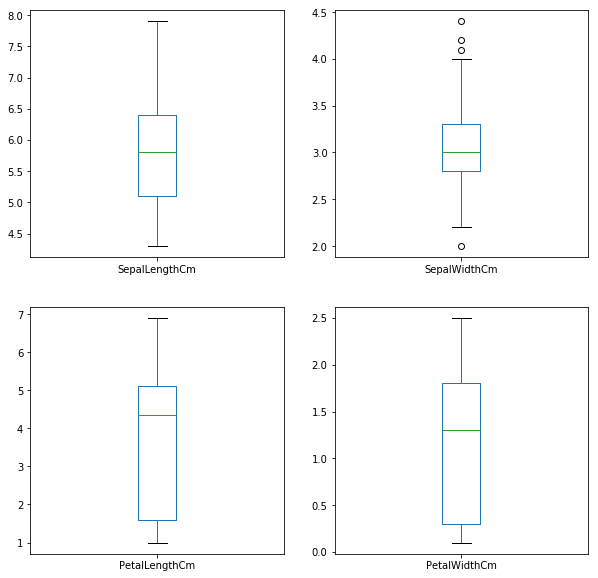

In [131]:
#BOX PLOT
dataset.plot(kind='box', subplots=True, layout=(2,2) ,sharex = False, sharey = False)
plt.rcParams['figure.figsize']=(10,10)
plt.show()

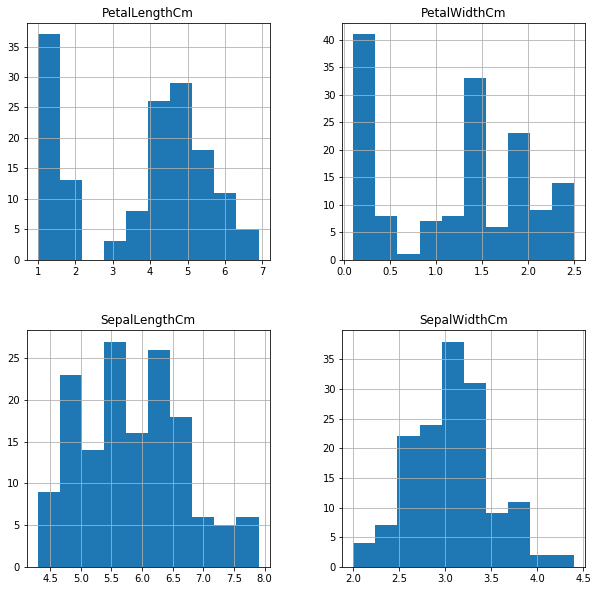

In [130]:
#Histogram
dataset.hist()
plt.rcParams['figure.figsize']=(10,10)
plt.show()

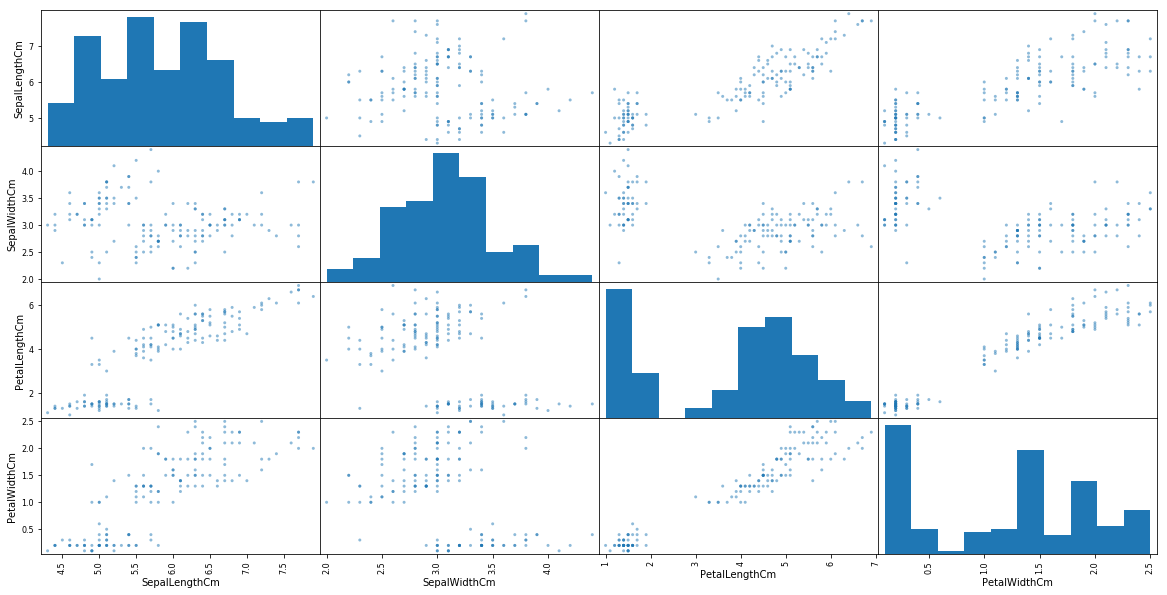

In [129]:
#ScatterPlot
scatter_matrix(dataset)
plt.rcParams['figure.figsize']=(10,10)
plt.show()

In [164]:
#Train Test Split
X = dataset.values[:,0:4]
Y = dataset.values[:,4]
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size = 0.2,random_state = 7)
seed = 7
scoring = 'accuracy'


In [173]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []

for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


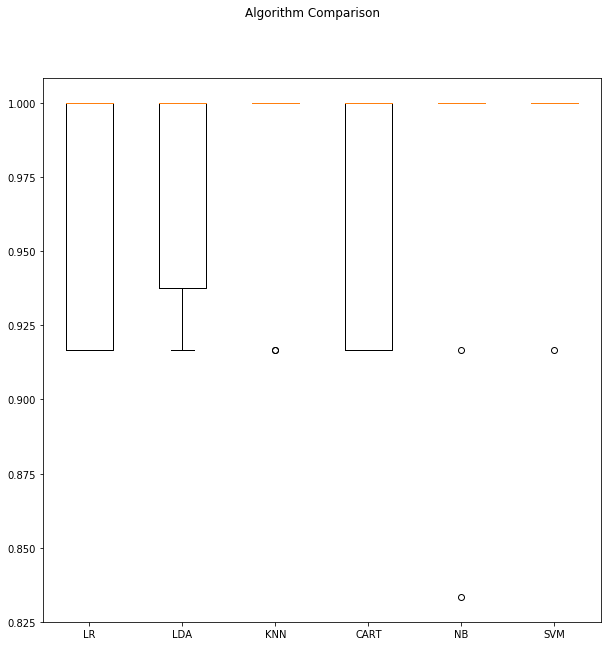

In [177]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [182]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

